In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import graphviz
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv('C:\Desktop\water quality\water_potability (2).csv')


In [75]:
df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.000000,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,369.000000,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [76]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2786.000000,3276.000000,3276.000000,3276.000000,2498.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.078253,196.369496,22014.092526,7.122277,333.803001,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.599668,32.879761,8768.570828,1.583085,41.424560,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.091810,176.850538,15666.690300,6.127421,307.697010,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.035894,196.967627,20927.833605,7.130299,333.076588,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.061702,216.667456,27332.762125,8.114887,360.040978,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2786 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2498 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [78]:
d = pd.DataFrame(df["Potability"].value_counts())
fig = px.pie(d, values = "Potability", names = ["Not Potable", "Potable"], hole = 0.35, opacity = 0.8,
            labels = {"label" :"Potability","Potability":"Number of Samples"})
fig.update_layout(title = dict(text = "Pie Chart of Potability Feature"))
fig.update_traces(textposition = "outside", textinfo = "percent+label")
fig.show()

In [79]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.081391,-0.088758,-0.034402,0.015039,0.015847,0.045228,0.001210,-0.036869,-0.002259
Hardness,0.081391,1.000000,-0.046899,-0.030054,-0.105297,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.088758,-0.046899,1.000000,-0.070148,-0.172554,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034402,-0.030054,-0.070148,1.000000,0.026691,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.015039,-0.105297,-0.172554,0.026691,1.000000,-0.015909,0.030313,-0.030056,-0.011888,-0.024080
Conductivity,0.015847,-0.023915,0.013831,-0.020486,-0.015909,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.045228,0.003610,0.010242,-0.012653,0.030313,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.001210,-0.013013,-0.009143,0.017084,-0.030056,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.036869,-0.014449,0.019546,0.002363,-0.011888,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.002259,-0.013837,0.033743,0.023779,-0.024080,-0.008128,-0.030001,0.007130,0.001581,1.000000


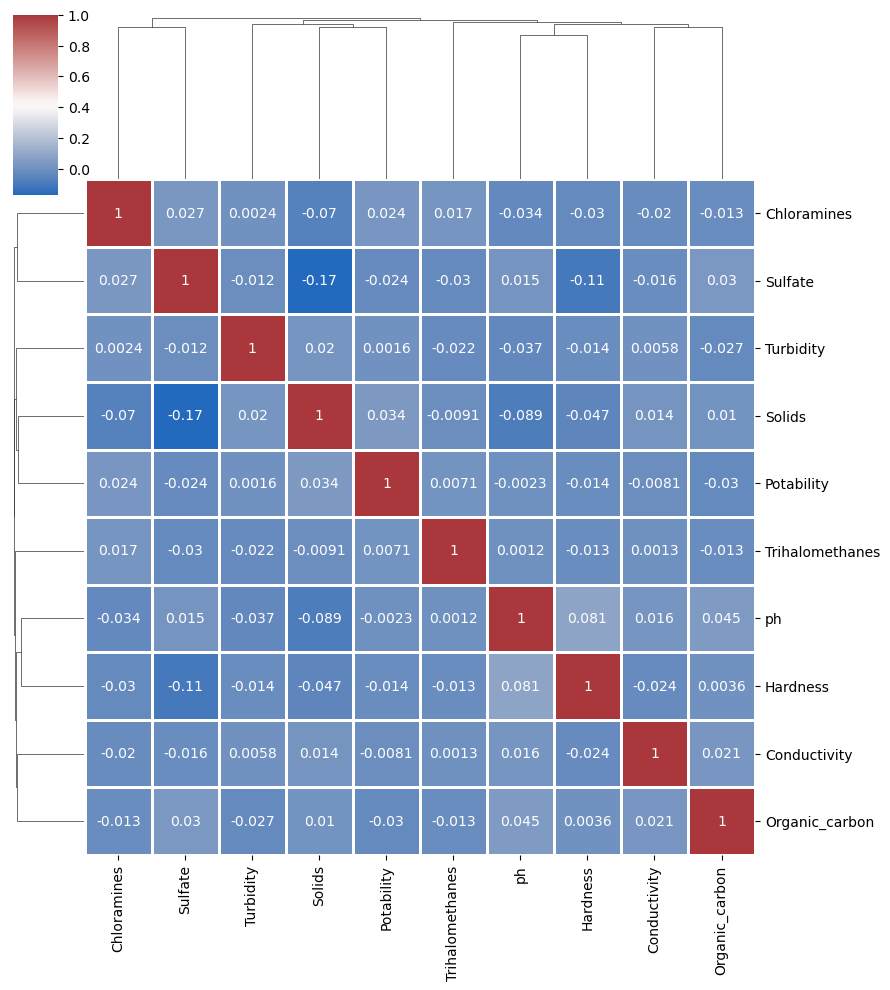

In [80]:
sns.clustermap(df.corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .8, figsize = (9,10))
plt.show()

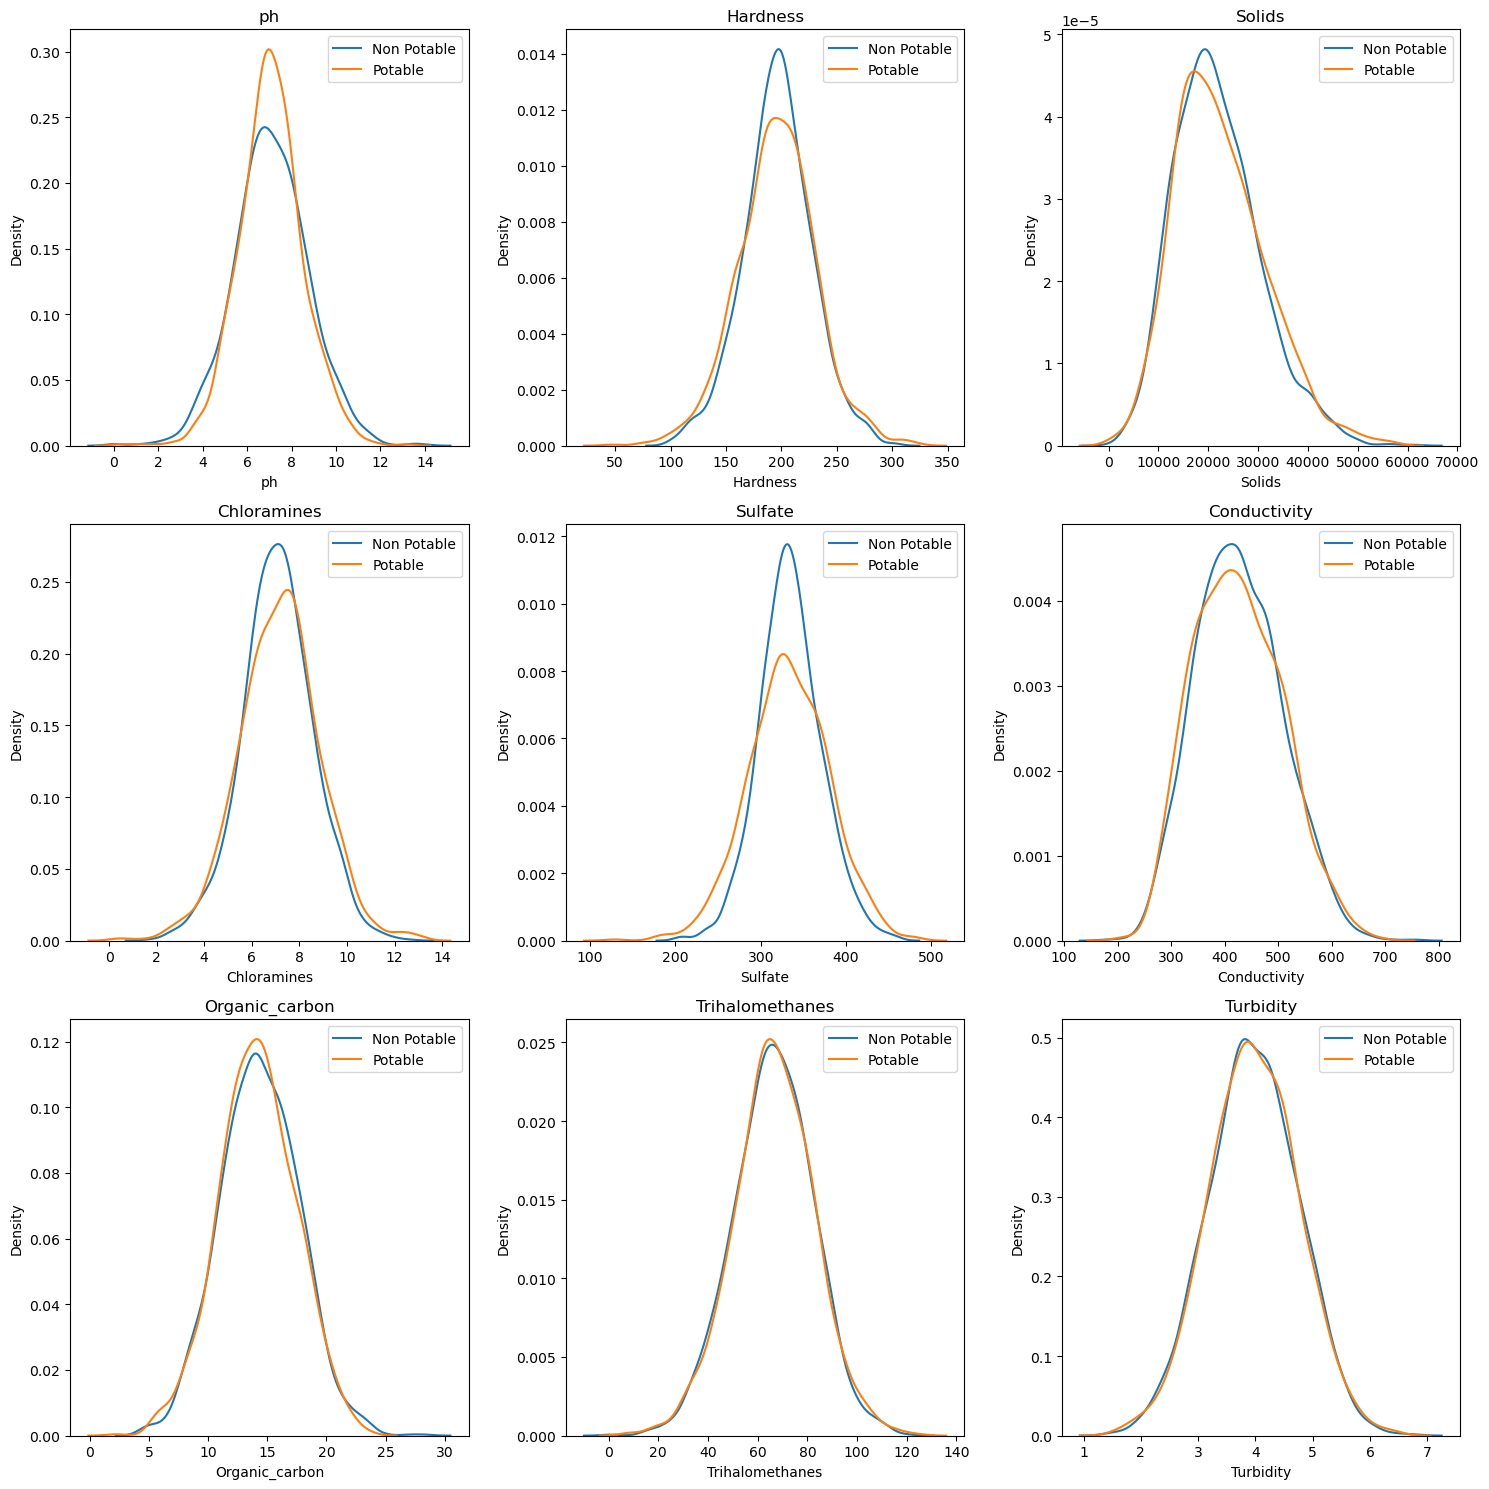

In [81]:
non_potable = df.query("Potability == 0")
potable = df.query("Potability == 1")

plt.figure(figsize = (15,15))
for ax, col in enumerate(df.columns[:9]):
    plt.subplot(3,3, ax + 1)
    plt.title(col)
    sns.kdeplot(x = non_potable[col], label = "Non Potable")
    sns.kdeplot(x = potable[col], label = "Potable")
    plt.legend()
plt.tight_layout()

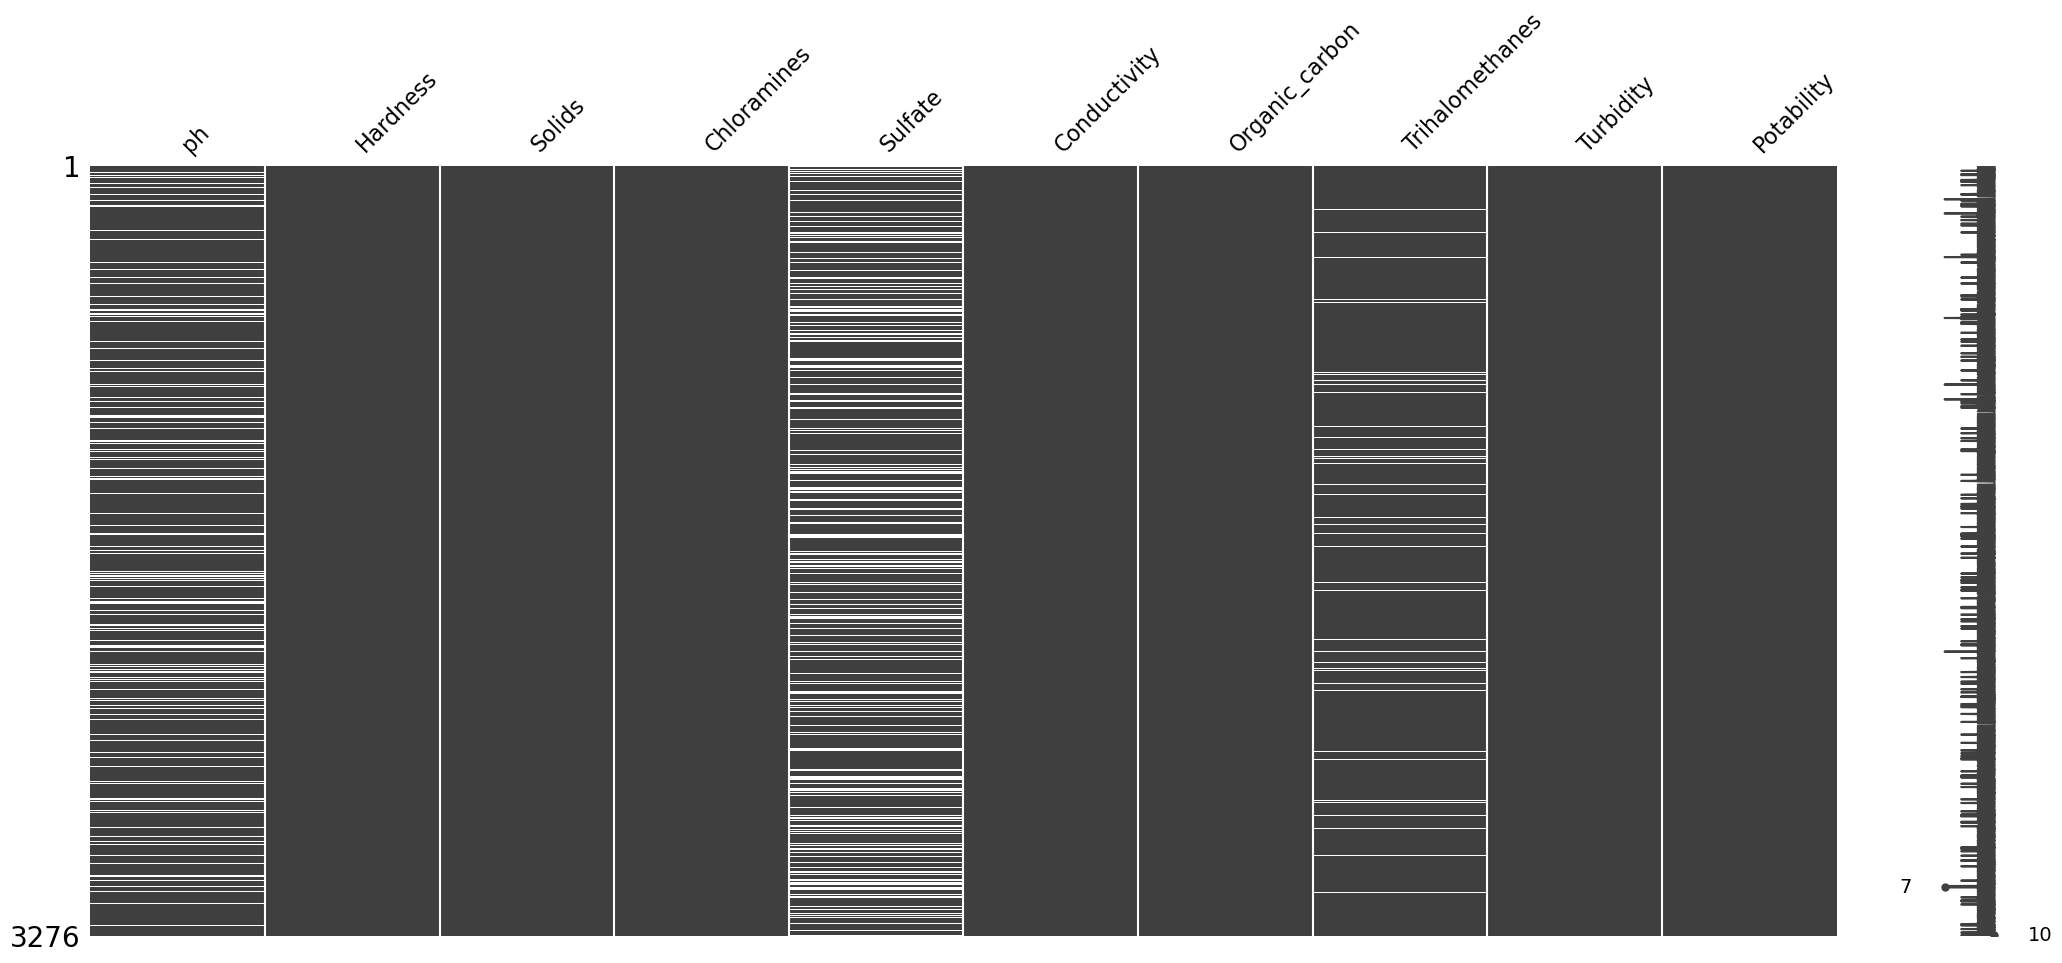

In [82]:
msno.matrix(df)
plt.show()

In [83]:
df.isnull().sum()

ph                 490
Hardness             0
Solids               0
Chloramines          0
Sulfate            778
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [84]:
# Handling missing values with the mean of forward and backward values(inherited mean imputation)
df["ph"].fillna(value=(df["ph"].ffill() + df["ph"].bfill()) / 2, inplace=True)
df["Sulfate"].fillna(value=(df["Sulfate"].ffill() + df["Sulfate"].bfill()) / 2, inplace=True)
df["Trihalomethanes"].fillna(value=(df["Trihalomethanes"].ffill() + df["Trihalomethanes"].bfill()) / 2, inplace=True)
# Filling the remaining missing values with the overall mean
df.fillna(df.mean(), inplace=True)

# Checking for any remaining missing values
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [85]:
#Desicion Tree And Random Forest Classifier


In [86]:
X = df.drop("Potability", axis = 1).values
y = df["Potability"].values

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (2293, 9)
X_test (983, 9)
y_train (2293,)
y_test (983,)


In [88]:
# min-max normalization
x_train_max = np.max(X_train)
x_train_min = np.min(X_train)
X_train = (X_train - x_train_min)/(x_train_max-x_train_min)
X_test = (X_test - x_train_min)/(x_train_max-x_train_min)

In [89]:
models = [("DTC", DecisionTreeClassifier(max_depth = 3)),
          ("RF",RandomForestClassifier())]

In [103]:
finalResults = []
cmList = []

for name, model in models:
    model.fit(X_train, y_train) # train
    model_result = model.predict(X_test) # prediction
    accuracy = accuracy_score(y_test, model_result)  # Calculate accuracy
    precision = precision_score(y_test, model_result)
    cm = confusion_matrix(y_test, model_result)
    
    finalResults.append((name, precision, accuracy))  # Add accuracy to the results
    cmList.append((name, cm))

finalResults

[('DTC', 0.5375939849624061, 0.6256358087487284),
 ('RF', 0.6203703703703703, 0.6581892166836215)]

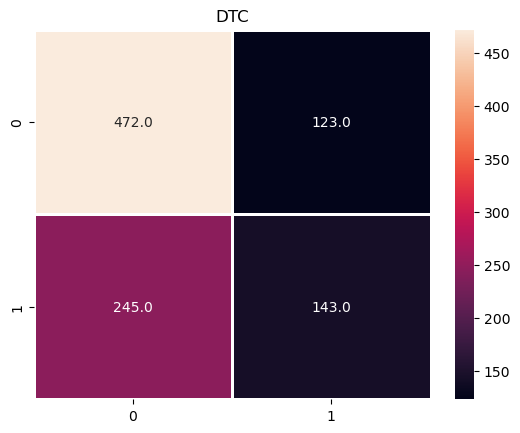

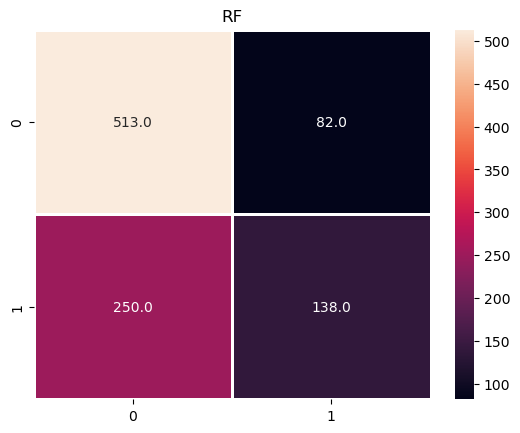

In [91]:
for name, i in cmList:
    plt.figure()
    sns.heatmap(i, annot = True, linewidths = 0.8, fmt = ".1f")
    plt.title(name)
    plt.show()

In [92]:
dt_clf = models[0][1]
dt_clf

DecisionTreeClassifier(max_depth=3)

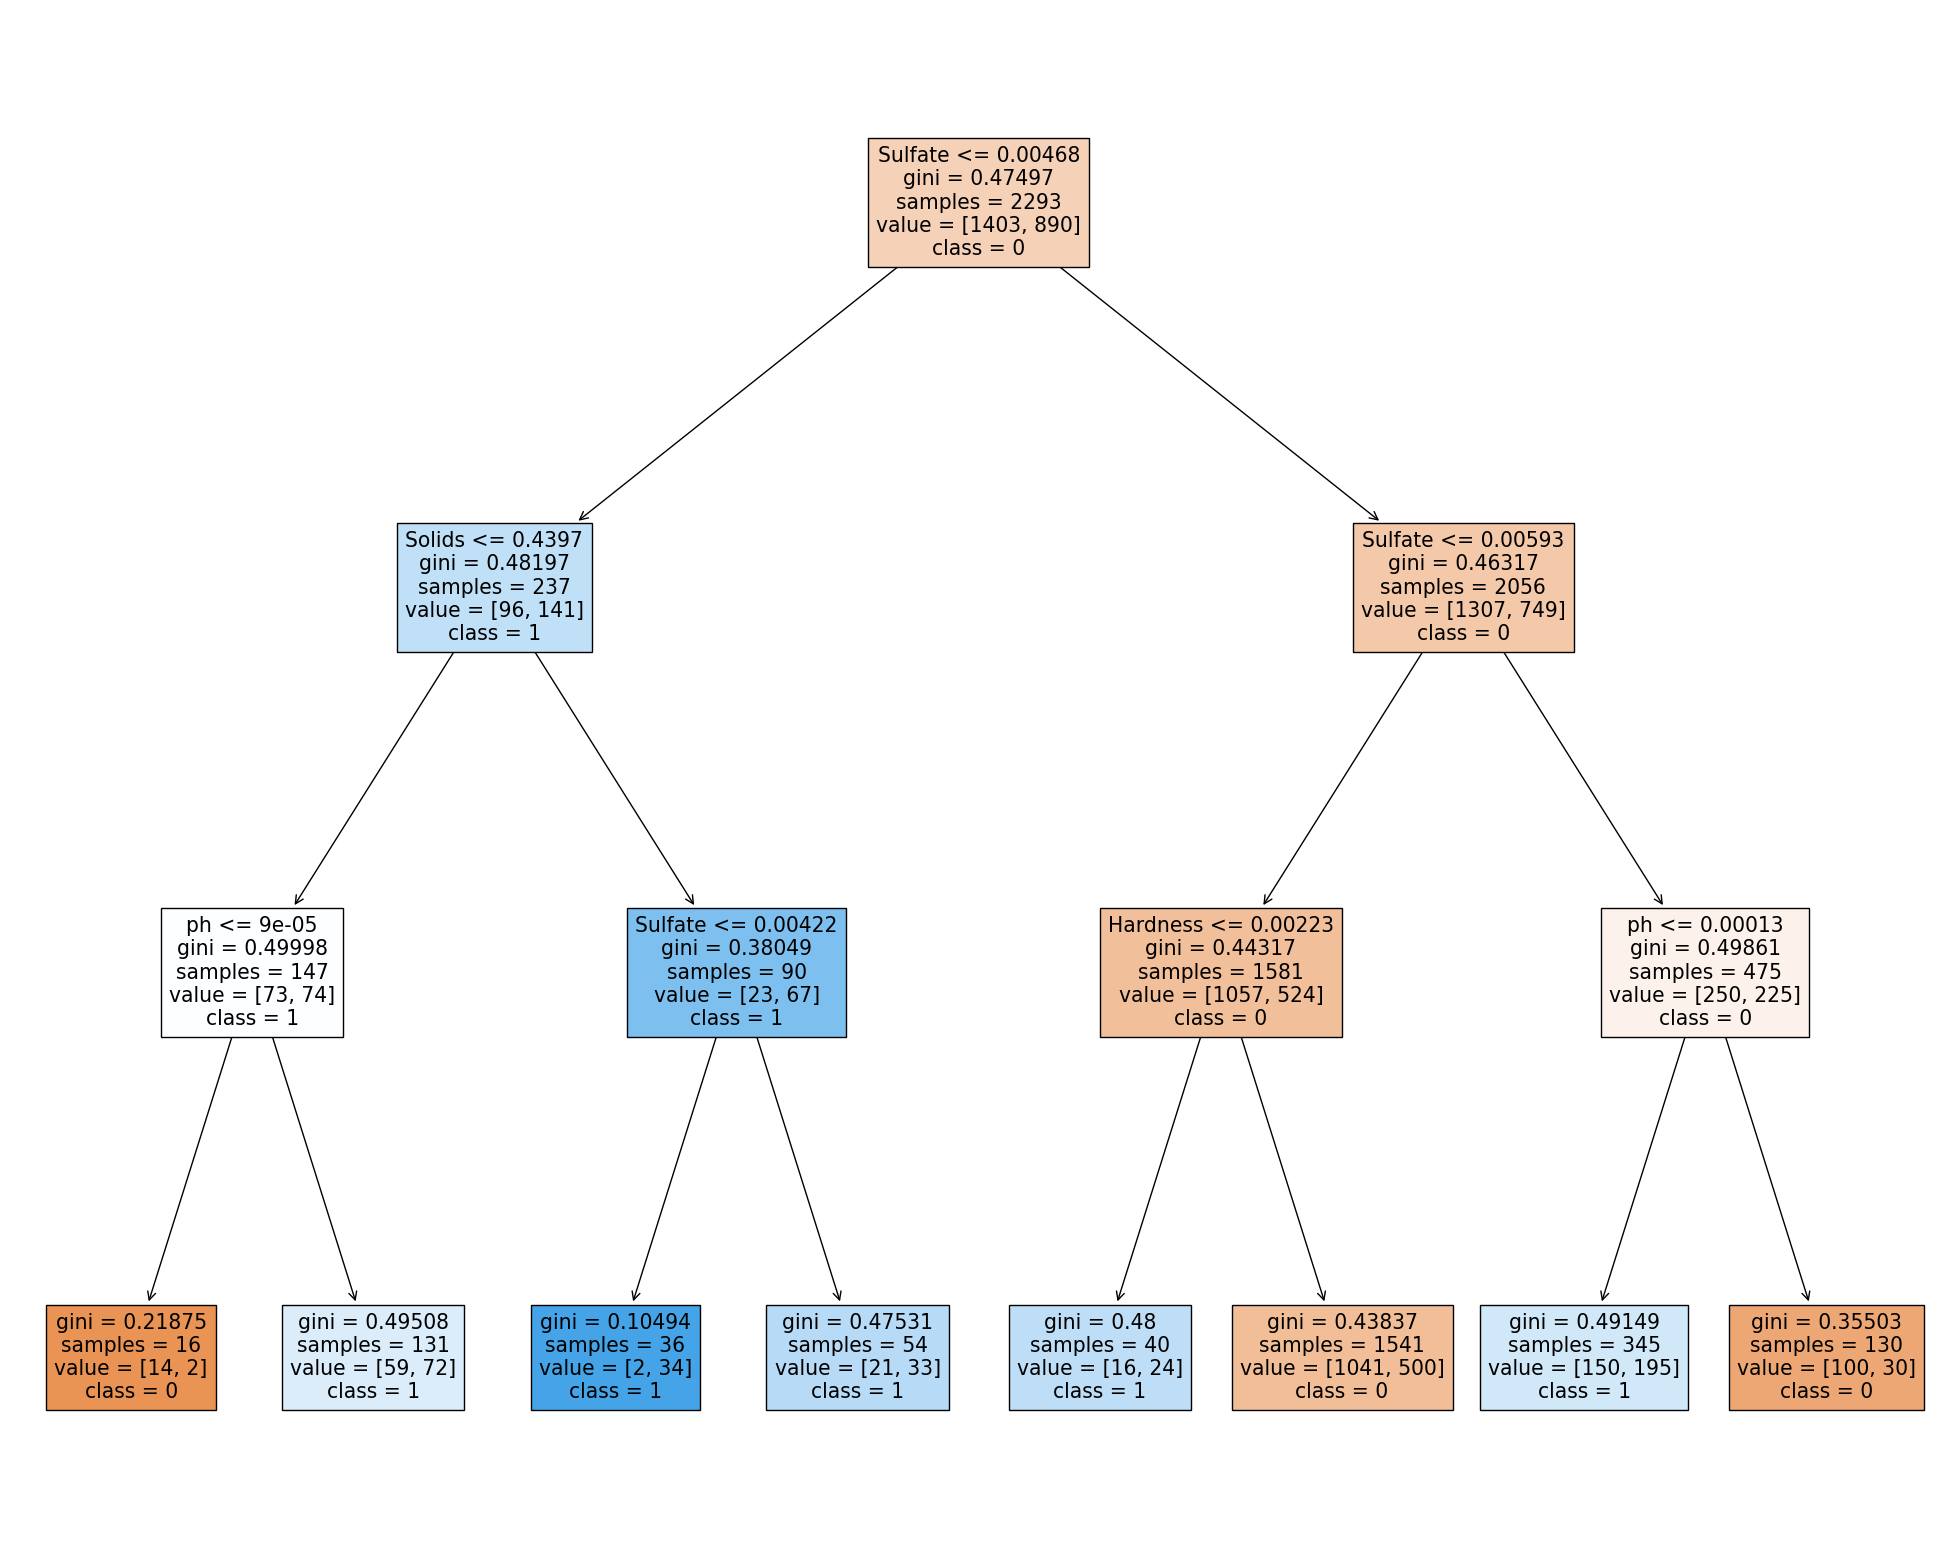

In [93]:
plt.figure(figsize = (25,20))
tree.plot_tree(dt_clf,
               feature_names =  df.columns.tolist()[:-1],
               class_names = ["0", "1"],
               filled = True,
               precision = 5)
plt.show()

In [94]:
model_params = {
    "Random Forest":
    {
        "model":RandomForestClassifier(),
        "params":
        {
            "n_estimators":[10, 50, 100],
            "max_features":["auto","sqrt","log2"],
            "max_depth":list(range(1,21,3))
        }
    }
    
}
model_params

{'Random Forest': {'model': RandomForestClassifier(),
  'params': {'n_estimators': [10, 50, 100],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth': [1, 4, 7, 10, 13, 16, 19]}}}

In [95]:
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2)
scores = []
for model_name, params in model_params.items():
    rs = RandomizedSearchCV(params["model"], params["params"], cv = cv, n_iter = 10)
    rs.fit(X,y)
    scores.append([model_name, dict(rs.best_params_),rs.best_score_])
scores

C:\Users\satya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\satya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\satya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFores

C:\Users\satya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\satya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

C:\Users\satya\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFores

[['Random Forest',
  {'n_estimators': 50, 'max_features': 'log2', 'max_depth': 19},
  0.6697200242040589]]

In [96]:
#support vector model

In [97]:
# Split the data
X = df.drop("Potability", axis=1).values
y = df["Potability"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [98]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [99]:
# Train a Support Vector Classifier (SVC)
svc_model = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42)
svc_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [100]:
# Evaluate the model
y_pred = svc_model.predict(X_test_scaled)
precision = precision_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [101]:
# Print precision score and confusion matrix
print("SVC Model Precision:", precision)
print("Confusion Matrix:\n", conf_matrix)
print("accuaracy:\n", accuracy)

SVC Model Precision: 0.7333333333333333
Confusion Matrix:
 [[551  44]
 [267 121]]
accuaracy:
 0.6836215666327569


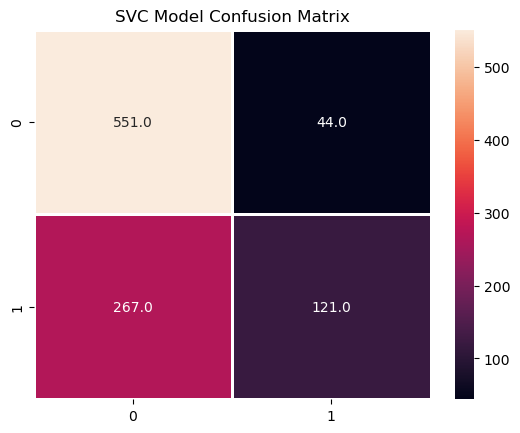

In [102]:
# Visualize confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, linewidths=0.8, fmt=".1f")
plt.title("SVC Model Confusion Matrix")
plt.show()